In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#from subprocess import check_output
import seaborn as sbn
#import sklearn import cross_validation
#from sklearn import cross_validation
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
#from sklearn import grid_search



In [2]:
df=pd.read_csv('file:///C:/Users/Rishab/PycharmProjects/Machine_Learning_project/Music_recomandation_sys/Untitled Folder/train.csv')
print('train_data',df.shape)
print('train_data',df.head())

train_data (7377418, 6)
train_data                                            msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist    

In [10]:
df_test=pd.read_csv('file:///D:/data/ML Data/final_codes/test.csv')
print("test_data",df_test.shape)
print('test_data',df_test.head())

test_data (2556790, 6)
test_data    id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  
0  Local playlist more        local-library  
1  Local playlist more        local-library  
2                  NaN  song-based-playlist  
3                Radio               

In [ ]:
members=pd.read_csv('file:///D:/data/ML Data/final_codes/members.csv')
songs=pd.read_csv('file:///D:/data/ML Data/final_codes/songs.csv')
song_extra_info=pd.read_csv('file:///D:/data/ML Data/final_codes/song_extra_info.csv')
print('members',members.shape)
print('members',members.head())
print('song_extra_info',song_extra_info.shape)
print('songs',songs.shape)
print('song',songs.head())

In [ ]:
#How many times do the user listen to the song again
print(df.target.value_counts()*100/df.target.value_counts().sum())

In [ ]:
#rcpharm for knowing the repeated songs
print('How many unique song is there',len(df.song_id.unique()))
rcParams['figure.figsize']=(20,6)
repeats=df[df.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']
song_repeats=pd.DataFrame(song_repeats).merge(songs,left_on='song_id',right_on='song_id')
print('median length of song repeated',song_repeats.
      sort_values(by='count',ascending=False)[:2000].song_length.median())
#[:2000] is for no of songs 2000 which are repeated
print('median length of song repeated',songs.song_length.median())


In [ ]:

#top 20 songs which are repeated
print('Top 20 songs repeated',song_repeats.song_id.value_counts()[:20])
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False)[:20])
df.artist_name.value_counts().plot(kind='bar')
plt.title('20_SONGS')
plt.ylabel('Count')
plt.xlabel('top 20 repearted songs')
#plt.show()

In [ ]:
#print('MOst common composer',repeats.artist_name.value_counts()[:200])

df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False)[:200])
df.artist_name.value_counts().plot(kind='bar')
plt.title('most common composer')
plt.ylabel('Count')
plt.xlabel('Composer')
#plt.show()

In [ ]:

#language of the most common song
import pandas as pd
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of most common songs')
plt.ylabel('Count')
plt.xlabel('Language')
#plt.show()

In [ ]:

#genarate the most listening song
df.genre_ids.value_counts()[:35].plot(kind='bar')
plt.title('the most listened of songs')
plt.xlabel('genre')
plt.ylabel('count')
#plt.show()

In [ ]:

#the most common composer
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False)[:200])
df.composer.value_counts().plot(kind='bar')
plt.title('most common composer')
plt.ylabel('Count')
plt.xlabel('Composer')
#plt.show()

In [ ]:

#song that are user listen again and again

print('user that listen the same song again and again',repeats.msno.value_counts()[:10])
repeats.msno.value_counts()[:10].plot(kind='bar')
plt.title('song repeats by user')
plt.ylabel('repeats by user')
plt.xlabel('count')
#plt.show()


In [ ]:

#song played by system tabs


#df=pd.DataFrame(repeats.sort_values(by='count',ascending=False))
repeats.source_system_tab.value_counts().plot(kind='bar')
plt.title('song repeats by system tabs')
plt.ylabel('System tables')
plt.xlabel('count')
#plt.show()

In [ ]:

#Repeat songs by screen name'
repeats.source_screen_name.value_counts().plot(kind='bar')
plt.title('Repeat songs by screen name')
plt.xlabel('screen names')
plt.ylabel('count')
#plt.show()


In [ ]:

#where the user played the music
repeats.source_type.value_counts().plot(kind='bar')
plt.title('Where does the user play music from')
plt.xlabel('source type')
plt.ylabel('count')
#plt.show()

In [ ]:

# user repeated common song
user_repeats=repeats.merge(members,left_on='msno',right_on='msno',how='left')
print('user repeated common song',user_repeats.msno.value_counts()[:20])
user_repeats.msno.value_counts()[:20].plot(kind='bar')
plt.title('user repeated common song')
plt.xlabel('user_repeated_song')
plt.ylabel('count')
#plt.show()


In [ ]:

#user repeated song by gender
user_repeats.gender.value_counts(dropna=False).plot(kind='bar')
plt.title('Users listening to same song by gender')
plt.xlabel('gender')
plt.ylabel("count")
#plt.show()

In [ ]:

#user repeated song by city
user_repeats.city.value_counts().plot(kind='bar')
plt.title('repeat users by city')
plt.xlabel('city')
plt.ylabel('count')
#plt.show()

In [ ]:
# repeat users by registration mechanism
user_repeats.registered_via.value_counts().plot(kind='bar')
plt.title('repeat users by registration mechanism')
plt.xlabel('registration mechanism')
plt.ylabel('count')
#plt.show()



#########################################

starting the Ml algorithim


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Linear Regression---------------------

In [9]:
df=pd.read_csv('file:///C:/Users/Rishab/PycharmProjects/Machine_Learning_project/Music_recomandation_sys/Untitled Folder/train.csv')
df = df.sample(frac=0.4)
#print(df.head())

In [10]:
#merge the song and member data_sets
songs=pd.read_csv('file:///D:/data/ML Data/final_codes/songs.csv')

#df=pd.concat([df,songs])
df = pd.merge(df, songs, on='song_id', how='left')


del songs
#print(df.shape)
members=pd.read_csv('file:///D:/data/ML Data/final_codes/members.csv')
df = pd.merge(df, members, on='msno', how='left')


#df=pd.concat([df,members])
del members
print(df.shape)
#print(df.head())

(2950967, 18)


In [11]:
#print the null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.338160
source_screen_name         5.629612
source_type                0.295293
target                     0.000000
song_length                0.001457
genre_ids                  1.599916
artist_name                0.001457
composer                  22.685547
lyricist                  43.081200
language                   0.001762
city                       0.000000
bd                         0.000000
gender                    40.169443
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [12]:
#removing the NA values from merge data_set

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)
#print(df.head())
print(df.shape)


C:\Users\Rishab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(2950967, 18)


In [13]:
#creating a column of Registration initial date using mm-yy-dd

df.registration_init_time=pd.to_datetime(df.registration_init_time, format='%Y%m%d',errors='ignore')

df['registration_init_time_year']=df['registration_init_time'].dt.year
df['registration_init_time_month']=df['registration_init_time'].dt.month
df['registration_init_time_day']=df['registration_init_time'].dt.day

#print(df.head())
print(df.shape)

(2950967, 21)


In [14]:
#creating a column expiration of using yy-mm-dd
df.expiration_date=pd.to_datetime(df.expiration_date, format='%Y%m%d',errors='ignore')

df['expiration_date_year']=df['expiration_date'].dt.year
df['expiration_date_month']=df['registration_init_time'].dt.month
df['expiration_date_day']=df['registration_init_time'].dt.day

#print(df.head())
print(df.shape)

(2950967, 24)


In [15]:
# convertion the this two column value into catagorial value

df['registration_init_time']=df['registration_init_time'].astype('category')

df['expiration_date']=df['expiration_date'].astype('category')

#print(df.head())
print(df.shape)




(2950967, 24)


In [16]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)
#print(df)

In [17]:
print(df.shape)
#print(df.columns)

(2950967, 22)


In [ ]:
#print(df.head())

In [11]:
from sklearn.decomposition import PCA
#principle component analysis
#analysis for two columns

pca=PCA(n_components=2)

t=pca.fit(df[df.columns[df.columns!='target']])
print(t)

principlecomponent=pca.fit_transform(df)
principal=pd.DataFrame(data=principlecomponent,columns=['pc1','pc2'])
print(principal)
finalDF=pd.concat([principal,df[['target']]],axis=1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
                   pc1            pc2
0        -66692.337080    6326.344568
1        -84880.082721   30168.553053
2        -70090.846893   42209.919180
3         92533.879469   23190.865463
4        105428.077358  -23546.433816
5        -23449.867598  146788.833920
6        -37302.110119  -18406.820777
7        -64940.060247  -18402.465398
8         80575.020004  -49430.517488
9        -26889.630723   -1117.304906
10       -84972.042077   24116.529479
11       -76085.633563   71032.996242
12        24705.806316  -55689.488353
13       -18845.520429  -63358.930495
14        72246.744531   21526.656274
15        21070.080528   80335.828768
16        81367.124984  -44764.635712
17       -31591.541651   20012.599566
18      -113654.322580    6588.695712
19        56351.747803   -8765.410044
20        64061.075180   11550.253515
21       -47637.584028  -40130.766270
22       

In [ ]:
#finalDF=pd.concat([principal,df[['target']]],axis=1)

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 15)
finalDF['color'] = 'b'
finalDF.loc[finalDF['pc1']>100 , 'color'] = 'g'
finalDF.loc[finalDF['pc2']>100, 'color'] = 'r'
ax.scatter(finalDF['pc1'], finalDF['pc2'], color=finalDF['color'], alpha=0.5)
#plt.show()

ax.grid()


ploting the PCA graph

Important point:


solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
Algorithm to use in the optimization problem.

#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

#handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

#‘liblinear’ and ‘saga’ also handle L1 penalty

#‘saga’ also supports ‘elasticnet’ penalty

#‘liblinear’ does not handle no penalty


In [ ]:
t=df[df.columns[df.columns!='target']]
print(t.shape)
print(t.columns)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
#                         fit_intercept=True, intercept_scaling=1, class_weight=None,
 #                        random_state=None, solver='liblinear', max_iter=100,
  #                       multi_class='ovr', verbose=0,
   #                      warm_start=False, n_jobs=1)

#model.fit(df[df.columns[df.columns!='target']],df.target)
logreg=LogisticRegression()

from sklearn.model_selection import  train_test_split

X = df.loc[:, df.columns != 'target']
print(X.shape)
y = df.loc[:, df.columns == 'target']

print(y.shape)



y=['y']
cols=['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day']
X=df[cols]
y=df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
logreg.fit(X_train, y_train)
#print(X_train.head())
#print(X_test.head())

(2950967, 21)
(2950967, 1)


C:\Users\Rishab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Implemanting the statmodel
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary2())




In [19]:
y_pred = logreg.predict(X_test)

print(y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)*100),'%')

#print(X_test,y_test)

#print(y_test)

[1 0 1 ... 0 0 1]
Accuracy of logistic regression classifier on test set: 59.52 %


In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                         fit_intercept=True, intercept_scaling=1, class_weight=None,
                         random_state=None, solver='liblinear', max_iter=100,
                         multi_class='ovr', verbose=0,
                    warm_start=False, n_jobs=1) 

model.fit(df[df.columns[df.columns!='target']],df.target)
model.score(df[df.columns[df.columns != 'target']], df.target)


0.5948467061813975

CONFUSION MATRIX.............



In [26]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



[[246213 193847]
 [164532 280699]]


The result is telling us that we have 246200+193688 correct predictions and 163670+281733 incorrect predictions.

In [43]:
df_test=test=pd.read_csv('file:///D:/data/ML Data/final_codes/test.csv')
songs =pd.read_csv('file:///D:/data/ML Data/final_codes/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs
# Load and join songs data
members =pd.read_csv('file:///D:/data/ML Data/final_codes/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

C:\Users\Rishab\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

predictions=np.zeros(shape=[len(df_test)])
print(predictions)
predictions+=model.predict(df_test.drop(['id'],axis=1))
print(predictions)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]


In [45]:
predictions = predictions/3
print(predictions)


[0.33333333 0.33333333 0.         ... 0.         0.         0.        ]


In [49]:
# predicted result submission file

submission=pd.read_csv('file:///D:/data/ML Data/final_codes/sample_submission.csv')
#submission=submission.sample(frac=0.6)

#fit the target with predictions 

submission.target=predictions
submission.to_csv('LR_PREDICTED_RESULT.csv',index=False)




In [53]:
# plot the roc curb......

length=df['target'].count()
print(lenth)

split=0.40

test=df[int(length*(1-split)):length]
df=df[:int(length*(1-split))]
print(test.shape)
print(df.shape)


2950967
(1180387, 22)
(1770580, 22)


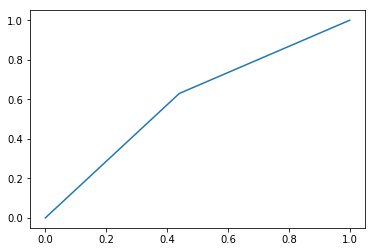

In [55]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.metrics import roc_curve,auc
X_test=test.drop(['target'],axis=1)
predictions_roc = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

plt.show()
